In [ ]:
# Ensure kaggle.json is in the location ~/.kaggle/kaggle.json to use the API.
# https://www.kaggle.com/<username>/account
# API > Create New API Token

!pip install kaggle
!kaggle competitions download -c titanic

In [1]:
import os
import pandas as pd
import numpy as np
import zipfile

In [51]:
zf = zipfile.ZipFile('titanic.zip')
csv_files = zf.infolist()
files = dict()

for csv in csv_files:
    print(csv.filename)
    df = pd.read_csv(zf.open(csv.filename))
    files[csv.filename] = df
    del df
zf.close()


gender_submission.csv
test.csv
train.csv


In [3]:
files['gender_submission.csv'].head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train = files['train.csv']
predict = files['test.csv']

In [5]:
train['title'] = train.Name\
    .str.split(',').apply(lambda x:x[1])\
    .str.split('.').apply(lambda x:x[0])\
    .astype('category')
train.Sex = train.Sex.astype('category')
train.Embarked = train.Embarked.astype('category')

In [6]:
#SibSp - Number of Siblings/Spouses Aboard
#Parch - Number of Parents/Children Aboard

pd.get_dummies(train[['Survived', 'PassengerId', 'Parch', 'Fare', 'Pclass', 'SibSp', 'Embarked','title']], 
               columns = ['title', 'Pclass', 'Embarked'])


,Survived,PassengerId,Parch,Fare,SibSp,title_ Capt,title_ Col,title_ Don,title_ Dr,title_ Jonkheer,...,title_ Ms,title_ Rev,title_ Sir,title_ the Countess,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7.2500,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,2,0,71.2833,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,7.9250,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,4,0,53.1000,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,5,0,8.0500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,0,13.0000,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
887,1,888,0,30.0000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
888,0,889,2,23.4500,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
889,1,890,0,30.0000,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [35]:
def make_dataset(df):
    df = df.copy()
    df['title'] = df.Name\
        .str.split(',').apply(lambda x:x[1])\
        .str.split('.').apply(lambda x:x[0])
        #.astype('category')
    #df.Sex = df.Sex.astype('category')
    #df.Embarked = df.Embarked.astype('category')
    return pd.get_dummies(
        df[['Parch', 'Fare', 'SibSp', 'Embarked', 'Pclass',  'title']], 
        columns = ['title', 'Pclass', 'Embarked'])


In [36]:
X = make_dataset(train)
y = train.Survived

predict_X  = make_dataset(predict)


X, predict_X = X.align(predict_X, join='outer', axis=1, fill_value = 0)
X

,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass_1,Pclass_2,Pclass_3,SibSp,title_ Capt,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,0,0,1,7.2500,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,71.2833,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,7.9250,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,53.1000,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,8.0500,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,13.0000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
887,0,0,1,30.0000,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,0,0,1,23.4500,2,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
889,1,0,0,30.0000,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500, random_state = 42).fit(X, y)
predict_y = lr.predict(predict_X.fillna(0))

In [38]:
submission = predict['PassengerId'].to_frame('PassengerId').copy()
submission['Survived'] = pd.Series(data = predict_y)

In [15]:
submission.to_csv('submit.csv', index = False)

In [228]:
#!kaggle competitions submit -c titanic -f submit.csv -m init

Successfully submitted to Titanic: Machine Learning from Disaster



  0%|          | 0.00/3.18k [00:00<?, ?B/s]
100%|##########| 3.18k/3.18k [00:00<00:00, 21.1kB/s]
100%|##########| 3.18k/3.18k [00:04<00:00, 733B/s]  


In [49]:
!kaggle c submissions -c titanic

fileName    date                 description  status    publicScore  privateScore  
----------  -------------------  -----------  --------  -----------  ------------  
submit.csv  2020-04-03 18:19:21  init         complete  0.80382      None          


In [11]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
lr = LogisticRegression(max_iter=500, random_state = 42)
print('cv mean:', np.mean(cross_val_score(lr, X, y)))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

y_predicted = lr.fit(X_train, y_train).predict(X_test)

cv mean: 0.8148076078086749


In [30]:
y_test.to_frame('actual').assign(predict = y_predicted)

,actual,predict
709,1,1
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
715,0,0
525,0,0
381,1,1
140,0,1


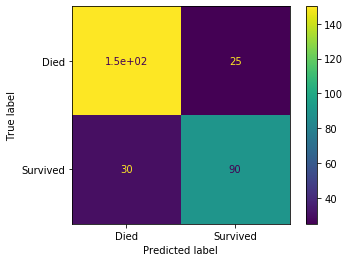

In [25]:
plot_confusion_matrix(lr.fit(X_train, y_train), X_test, y_test, 
                      display_labels = ['Died', 'Survived'])

In [40]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       175
           1       0.78      0.75      0.77       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.81      0.81      0.81       295



#### Classification `Rate/Accuracy`:
+ Accuracy = (TP + TN) / (TP + TN + FP + FN) = (100 + 50) /(100 + 5 + 10 + 50) = 0.90

#### `Recall`: Recall gives us an idea about when it’s actually yes, how often does it predict yes.
+ Recall = TP / (TP + FN) = 100 / (100 + 5) = 0.95

#### `Precision`: Precsion tells us about when it predicts yes, how often is it correct.
+ Precision = TP / (TP + FP)=100/ (100+10) = 0.91

#### `F-measure`:
+ Fmeasure = (2 * Recall * Precision) / (Recall + Presision) = (2 * 0.95 * 0.91) / (0.91 + 0.95) = 0.92

In [ ]:
https://realpython.com/logistic-regression-python/
https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
https://www.kaggle.com/sashr07/kaggle-titanic-tutorial